In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as sns

In [2]:
loanData = pd.read_csv("LoanData.csv")

In [3]:
loanData

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loanDataStatus = (loanData['Loan_Status'] == 'N')

In [5]:
loanDataFiltered = loanData[loanDataStatus]

In [6]:
loanDataFiltered['LoanAmount']

1      128.0
7      158.0
9      349.0
13     114.0
17      76.0
       ...  
596    187.0
597     88.0
600    350.0
605      NaN
613    133.0
Name: LoanAmount, Length: 192, dtype: float64

In [7]:
loanData = loanData.dropna()

In [8]:
loanData_train, loanData_test = train_test_split(loanData, test_size=0.3, stratify=loanData['Loan_Status'], random_state=42)
print(loanData_train.shape, loanData_test.shape)

(336, 13) (144, 13)


In [9]:
features= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
dt = DecisionTreeClassifier(max_depth = 4)

In [10]:
dt.fit(loanData_train[features], loanData_train['Loan_Status'])

DecisionTreeClassifier(max_depth=4)

In [11]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [12]:
predictionsOnTrainset = dt.predict(loanData_train[features])
predictionsOnTestset = dt.predict(loanData_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, loanData_train.Loan_Status)
accuracyTest = calculate_accuracy(predictionsOnTestset, loanData_test.Loan_Status)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7321428571428571
Accuracy on test set 0.7013888888888888


In [13]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

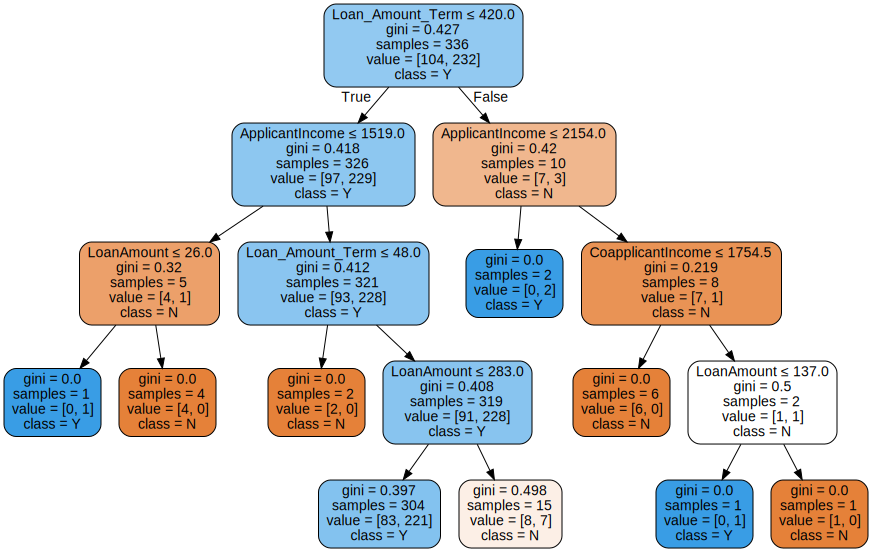

In [16]:
plot_tree_classification(dt, features, loanData.Loan_Status.unique())